In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
import numpy as np

In [67]:
my_data_dir = "E:\\Downloads\\dataset - Copy\\dataset - Copy"

In [68]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
# لإرجاع قائمة بأسماء الملفات أو المجلدات الموجودة في المجلد المحدد
os.listdir(my_data_dir) 

['test', 'train']

In [69]:
test_path = my_data_dir+'\\test'
train_path = my_data_dir+'\\train'
print(os.listdir(test_path))
print("##########")
print(os.listdir(train_path))

['alpaca', 'not_alpaca']
##########
['alpaca', 'not_alpaca']


In [70]:
os.listdir(train_path+'\\not_alpaca')[0]

'002bdaf1c177effd.jpg'

In [71]:
not_alpaca_photo = train_path+'\\not_alpaca'+'\\002bdaf1c177effd.jpg'

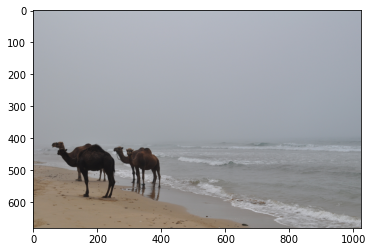

In [72]:
not_alpaca_photo=imread(not_alpaca_photo)
plt.imshow(not_alpaca_photo)

In [73]:
not_alpaca_photo.shape

(680, 1024, 3)

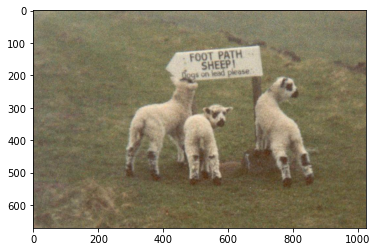

In [74]:
alpaca_path = train_path+'\\alpaca\\'+os.listdir(train_path+'\\alpaca')[0]
alpaca = imread(alpaca_path)
plt.imshow(alpaca)

In [75]:
len(os.listdir(train_path+'\\not_alpaca'))

183

In [76]:
len(os.listdir(train_path+'\\alpaca'))

140

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees  -->تدوير
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                                                #القص يعني قطع جزء من الصورة
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )                     #أقرب # ملء البكسلات المفقودة بأقرب قيمة مملوءة

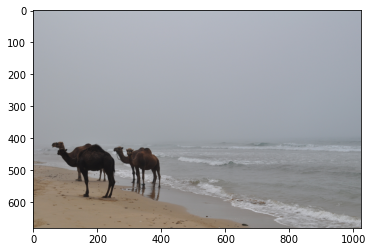

In [79]:
plt.imshow(not_alpaca_photo)

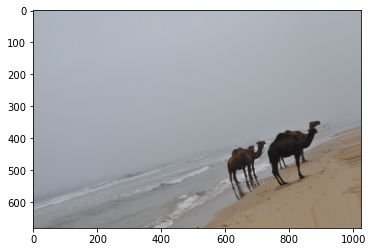

In [80]:
plt.imshow(image_gen.random_transform(not_alpaca_photo))

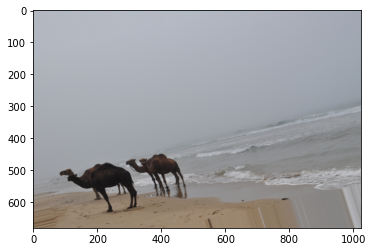

In [81]:
plt.imshow(image_gen.random_transform(not_alpaca_photo))

In [82]:
image_gen.flow_from_directory(train_path)

Found 323 images belonging to 2 classes.


In [83]:
image_gen.flow_from_directory(test_path)

Found 4 images belonging to 2 classes.


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

In [85]:
image_shape = (300,300,3)

In [86]:
# Initialising the CNN
classifier = Sequential()

#1 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#2 - Pooling
# Hidden Layer 1
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolution layer
# relu turns negative values in images to 0
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3 - Flattening
# converts the matrix in a singe array
classifier.add(Flatten())


classifier.add(Dense(units=128,activation='relu'))


#4 - Full Connection
# 128 is the final layer of outputs & from that 1 will be considered.

# Last layer, remember its binary so we use sigmoid
classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [87]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 64)      

In [88]:
batch_size = 1

In [89]:
image_shape

(300, 300, 3)

In [90]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 323 images belonging to 2 classes.


In [91]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 4 images belonging to 2 classes.


In [92]:
train_image_gen.class_indices

{'alpaca': 0, 'not_alpaca': 1}

In [93]:
results = classifier.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             )

Epoch 1/20
323/323 [==============================] - 44s 132ms/step - loss: 0.8502 - accuracy: 0.5480 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 2/20
323/323 [==============================] - 42s 130ms/step - loss: 0.6862 - accuracy: 0.5573 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 3/20
323/323 [==============================] - 42s 130ms/step - loss: 0.6853 - accuracy: 0.5604 - val_loss: 0.6085 - val_accuracy: 0.5000
Epoch 4/20
323/323 [==============================] - 42s 130ms/step - loss: 0.6507 - accuracy: 0.5789 - val_loss: 0.5659 - val_accuracy: 0.5000
Epoch 5/20
323/323 [==============================] - 42s 130ms/step - loss: 0.7602 - accuracy: 0.5635 - val_loss: 0.5969 - val_accuracy: 0.5000
Epoch 6/20
323/323 [==============================] - 41s 128ms/step - loss: 0.6507 - accuracy: 0.5851 - val_loss: 0.5284 - val_accuracy: 0.5000
Epoch 7/20
323/323 [==============================] - 41s 127ms/step - loss: 0.6233 - accuracy: 0.5573 - val_loss: 0.5469 - val_ac

In [94]:
classifier.metrics_names

['loss', 'accuracy']

In [95]:
classifier.evaluate_generator(test_image_gen)

[0.5019023418426514, 0.75]

In [96]:
from tensorflow.keras.preprocessing import image
pred_probabilities = classifier.predict_generator(test_image_gen)
pred_probabilities

array([[0.44794315],
       [0.44878635],
       [0.9918344 ],
       [0.44794315]], dtype=float32)

In [97]:
test_image_gen.classes

array([0, 0, 1, 1])

In [98]:
predictions = pred_probabilities > 0.5

In [99]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [ True],
       [False]])

In [100]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [101]:
x=confusion_matrix(test_image_gen.classes,predictions)
x

array([[2, 0],
       [1, 1]], dtype=int64)

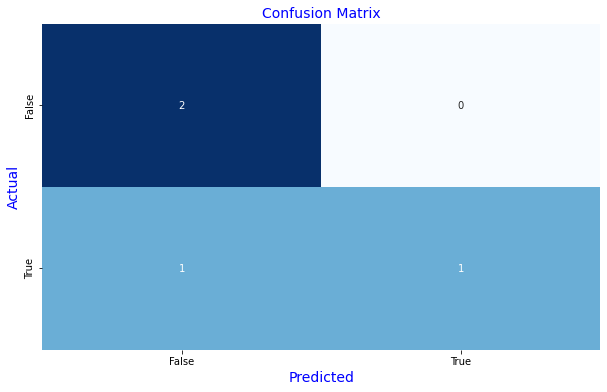

In [102]:
plt.figure(figsize=(10, 6))
sns.heatmap(x, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])  
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])  
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()